Jérémy Georges et Sébastien Musetti Royer

IMPORTATION DES BIBLIOTHEQUES

In [35]:
#importation des bibliothèques
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#RECUPERATION PAGE WEB TOPACHAT
##fonctions qui vont nous permettre de récupérer les données de chacun des composants en parcourant chaque page en classant les produits par ordre alphabétique

In [36]:
#RECUPARATION PAGE WEB TOPACHAT
def recuperation_donnee_topachat(lien_url):
    liste_page = []
    page_topachat = requests.get(lien_url)
    soup_topachat = BeautifulSoup(page_topachat.text, "html.parser")
    liste_page.append(soup_topachat)
    numero_page = 2
    exception = True
    while(exception):
        try:
            page_topachat = requests.get(lien_url[:len(lien_url)-40]+"_puis_page_est_"+str(numero_page)+"_puis_ordre_est_L_puis_sens_est_ASC.html")
            soup_topachat = BeautifulSoup(page_topachat.text, "html.parser")
            if (soup_topachat.find('section', attrs = {'class' : 'produits list'}).text.find("Désolé mais aucun article n’est actuellement disponible dans cette catégorie") == -1):
                liste_page.append(soup_topachat)
                numero_page +=1
            else:
                exception = False
        except ValueError:
            exception = False
    return liste_page



#on recupere les articles avec tous les processeurs
def ajout_donnees_dataframe(liste_page, dataframe_topachat):
    compteur_article = 0
    for soup_topachat in liste_page:
        #basique
        article_topachat_NOR = soup_topachat.findAll('article', attrs = {'class' : 'grille-produit NOR'})
        #nouveauté
        article_topachat_NEW = soup_topachat.findAll('article', attrs = {'class' : 'grille-produit NEW'})
        #opération spéciale
        article_topachat_OPS = soup_topachat.findAll('article', attrs = {'class' : 'grille-produit OPS'})
        #remise
        article_topachat_CCP = soup_topachat.findAll('article', attrs = {'class' : 'grille-produit CCP'})
        for article in article_topachat_NOR:
            dataframe_topachat.loc[compteur_article] = [article.find('h3').text, float(article.find('div', attrs ={'class' : 'prod_px_euro v16'}).text[:len(article.find('div', attrs ={'class' : 'prod_px_euro v16'}).text)-2]), article.find('div', attrs ={'class' : 'small'}).text, "https://www.topachat.com"+article.find('a').get('href')] 
            compteur_article += 1
        for article in article_topachat_NEW:
            dataframe_topachat.loc[compteur_article] = [article.find('h3').text, float(article.find('div', attrs ={'class' : 'prod_px_euro v16'}).text[:len(article.find('div', attrs ={'class' : 'prod_px_euro v16'}).text)-2]), article.find('div', attrs ={'class' : 'small'}).text, "https://www.topachat.com"+article.find('a').get('href')] 
            compteur_article += 1
        for article in article_topachat_OPS:
            dataframe_topachat.loc[compteur_article] = [article.find('h3').text, float(article.find('div', attrs ={'class' : 'prod_px_euro v16'}).text[:len(article.find('div', attrs ={'class' : 'prod_px_euro v16'}).text)-2]), article.find('div', attrs ={'class' : 'small'}).text, "https://www.topachat.com"+article.find('a').get('href')] 
            compteur_article += 1
        for article in article_topachat_CCP:
            dataframe_topachat.loc[compteur_article] = [article.find('h3').text, float(article.find('div', attrs ={'class' : 'prod_px_euro v16'}).text[:len(article.find('div', attrs ={'class' : 'prod_px_euro v16'}).text)-3]), article.find('div', attrs ={'class' : 'small'}).text, "https://www.topachat.com"+article.find('a').get('href')] 
            compteur_article += 1
            
def dataframe_unique(lien_url):
    liste_page = recuperation_donnee_topachat(lien_url)
    dataframe_topachat = pd.DataFrame(columns = ['Nom', 'Prix(€)', 'Informations Supplementaires', 'Reference url'])
    ajout_donnees_dataframe(liste_page, dataframe_topachat) 
    return dataframe_topachat

def dataframe_donnee_unique(dataframe):
    nouveau = dataframe.copy()
    nouveau.drop_duplicates()
    
    return len(nouveau)==len(dataframe)

#CREATION DES DATAFRAMES POUR CHAQUE COMPOSANT

In [37]:
#Création du dataframe des processeurs et ajout
print("Début du chargement de la page des processeurs")
page_url_processeur = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_wpr_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_processeur = dataframe_unique(page_url_processeur)
print(dataframe_topachat_processeur)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_processeur)))
print("Fin de la page des processeurs\n")

#Création du dataframe des cartes graphiques et ajout
print("Début du chargement de la page des cartes graphiques")
page_url_cartegraphique = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_wgfx_pcie_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_cartegraphique = dataframe_unique(page_url_cartegraphique)
print(dataframe_topachat_cartegraphique)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_cartegraphique)))
print("Fin de la page des cartes graphiques\n")

#Création du dataframe des boitiers et ajout
print("Début du chargement de la page des boitiers")
page_url_boitier = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_w_boi_sa_puis_ordre_est_L_puis_sens_est_ASC.html"  
dataframe_topachat_boitier = dataframe_unique(page_url_boitier)
print(dataframe_topachat_boitier)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_boitier)))
print("Fin de la page des boitiers\n")

#Création du dataframe des SSD et ajout
print("Début du chargement de la page des SSD")
page_url_ssd = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_w_ssd_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_ssd = dataframe_unique(page_url_ssd)
print(dataframe_topachat_ssd)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_ssd)))
print("Fin de la page des SSD\n")

#Création du dataframe des HDD et ajout
print("Début du chargement de la page des HDD")
page_url_hdd = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_wdi_sata_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_hdd = dataframe_unique(page_url_hdd)
print(dataframe_topachat_hdd)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_hdd)))
print("Fin de la page des HDD\n")

#Création du dataframe des DDR4 et ajout
print("Début du chargement de la page des DDR4")
page_url_DDR4 = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_wme_ddr4_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_DDR4 = dataframe_unique(page_url_DDR4)
print(dataframe_topachat_DDR4)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_DDR4)))
print("Fin de la page des DDR4\n")

#Création du dataframe des DDR3 et ajout
print("Début du chargement de la page des DDR3")
page_url_DDR3 = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_wme_ddr3_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_DDR3 = dataframe_unique(page_url_DDR3)
print(dataframe_topachat_DDR3)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_DDR3)))
print("Fin de la page des DDR3\n")

#Création du dataframe des 1151 et ajout
print("Début du chargement de la page des 1151")
page_url_1151 = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_w_cm_1151_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_1151 = dataframe_unique(page_url_1151)
print(dataframe_topachat_1151)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_1151)))
print("Fin de la page des 1151\n")

#Création du dataframe des 1200 et ajout
print("Début du chargement de la page des 1200")
page_url_1200 = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_w_cm_1200_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_1200 = dataframe_unique(page_url_1200)
print(dataframe_topachat_1200)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_1200)))
print("Fin de la page des 1200\n")

#Création du dataframe des AM4 et ajout
print("Début du chargement de la page des AM4")
page_url_AM4 = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_w_cm_am4_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_AM4 = dataframe_unique(page_url_AM4)
print(dataframe_topachat_AM4)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_AM4)))
print("Fin de la page des AM4\n")

#Création du dataframe des TRX4 et ajout
print("Début du chargement de la page des TRX4")
page_url_TRX4 = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_w_cm_trx4_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_TRX4 = dataframe_unique(page_url_TRX4)
print(dataframe_topachat_TRX4)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_TRX4)))
print("Fin de la page des TRX4\n")

#Création du dataframe des 2066 et ajout
print("Début du chargement de la page des 2066")
page_url_2066 = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_w_cm_2066_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_2066 = dataframe_unique(page_url_2066)
print(dataframe_topachat_2066)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_2066)))
print("Fin de la page des 2066\n")

#Création du dataframe des alimentations et ajout
print("Début du chargement de la page des Alimentations")
page_url_alimentation = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_w_ven_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_alimentation = dataframe_unique(page_url_alimentation)
print(dataframe_topachat_alimentation)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_alimentation)))
print("Fin de la page des Alimentations\n")

#Création du dataframe des watercooling et ajout
print("Début du chargement de la page des watercoolings")
page_url_watercooling = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_w_reliq_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_watercooling = dataframe_unique(page_url_watercooling)
print(dataframe_topachat_watercooling)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_watercooling)))
print("Fin de la page des watercoolings\n")

#Création du dataframe des aircooling et ajout
print("Début du chargement de la page des aircoolings")
page_url_aircooling = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_w_ven_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_aircooling = dataframe_unique(page_url_aircooling)
print(dataframe_topachat_aircooling)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_aircooling)))
print("Fin de la page des aircoolings\n")

#Création du dataframe des pates thermiques et ajout
print("Début du chargement de la page des pates thermiques")
page_url_patethermique = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_w_path_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_patethermique = dataframe_unique(page_url_patethermique)
print(dataframe_topachat_patethermique)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_patethermique)))
print("Fin de la page des pates thermiques\n")

#Création du dataframe des ventilateurs et ajout
print("Début du chargement de la page des ventilateurs")
page_url_ventilateur = "https://www.topachat.com/pages/produits_cat_est_micro_puis_rubrique_est_w_tu_ven_puis_ordre_est_L_puis_sens_est_ASC.html"
dataframe_topachat_ventilateur = dataframe_unique(page_url_ventilateur)
print(dataframe_topachat_ventilateur)
print("Les données sont elles uniques ? : "+str(dataframe_donnee_unique(dataframe_topachat_ventilateur)))
print("Fin de la page des ventilateurs\n")

Début du chargement de la page des processeurs
                                   Nom  Prix(€)  \
0          AMD Ryzen 3 3200G (3.6 GHz)   138.99   
1        AMD Ryzen 5 1600 AF (3.2 GHz)   149.99   
2           AMD Ryzen 5 2600 (3.4 GHz)   189.99   
3          AMD Ryzen 5 2600X (3.6 GHz)   189.99   
4          AMD Ryzen 5 3400G (3.7 GHz)   169.99   
..                                 ...      ...   
68           Intel i3-10100F (3.6 GHz)    99.99   
69  Intel Pentium Gold G5420 (3.8 GHz)    64.99   
70  Intel Pentium Gold G6400 (4.0 GHz)    61.99   
71  Intel Pentium Gold G6500 (4.1 GHz)    94.99   
72  Intel Pentium Gold G6600 (4.2 GHz)   114.99   

                         Informations Supplementaires  \
0   Processeur Socket AM4 - Quad Core - Cache 6 Mo...   
1   Processeur Socket AM4 - Hexa Core - Cache 19 M...   
2   Processeur Socket AM4 - Hexa Core - Cache 19 M...   
3   Processeur Socket AM4 - Hexa Core - Cache 19 M...   
4   Processeur Socket AM4 - Quad Core - Cache 6 Mo...  

#RECUPERATION PAGE WEB DE BENCHMARK POUR LES CPU ET LES GPU

In [38]:
def creation_dataframe_passmarksoftware(lien_url, dataframe_score):
    page_passmarksoftware = requests.get(lien_url)
    soup_passmarksoftware = BeautifulSoup(page_passmarksoftware.text, "html.parser")
    tableau_passmarksoftware = soup_passmarksoftware.find('table', attrs = {'id' : 'cputable'})
    tableau_head_passmarksoftware = tableau_passmarksoftware.find('tbody')
    lignes_tableau_passmarksoftware = tableau_head_passmarksoftware.findAll('tr')
    compteur = 0
    for ligne in lignes_tableau_passmarksoftware:
        dataframe_score.loc[compteur] = [ligne.find('a').text, ligne.findAll('td')[1].text]
        compteur += 1
        
#Création du dataframe de score du processeur
dataframe_score_processeur = pd.DataFrame(columns = ['Nom', 'Score'])
creation_dataframe_passmarksoftware("https://www.cpubenchmark.net/cpu_list.php", dataframe_score_processeur)
print(dataframe_score_processeur)

#Création du dataframe de score des cartes graphiques
dataframe_score_cartegraphique = pd.DataFrame(columns = ['Nom', 'Score'])
creation_dataframe_passmarksoftware("https://www.videocardbenchmark.net/gpu_list.php", dataframe_score_cartegraphique)
print(dataframe_score_cartegraphique)

#Création du dataframe de score des HDD
dataframe_score_cartegraphique = pd.DataFrame(columns = ['Nom', 'Score'])
creation_dataframe_passmarksoftware("https://www.videocardbenchmark.net/gpu_list.php", dataframe_score_cartegraphique)
print(dataframe_score_cartegraphique)

#Création du dataframe de score des RAM
dataframe_score_ram = pd.DataFrame(columns = ['Nom', 'Score'])
creation_dataframe_passmarksoftware("https://www.videocardbenchmark.net/gpu_list.php", dataframe_score_ram)
print(dataframe_score_ram)


                                     Nom  Score
0                              AMD 3015e  2,678
1                              AMD 3020e  2,652
2                AMD A10 Micro-6700T APU  1,291
3                  AMD A10 PRO-7350B APU  1,896
4                  AMD A10 PRO-7800B APU  3,096
...                                  ...    ...
3012           VIA QuadCore C4650@2.0GHz  1,323
3013       VIA QuadCore L4700 @ 1.2+ GHz    773
3014       VIA QuadCore U4650 @ 1.0+ GHz    666
3015    ZHAOXIN KaiXian KX-U6780A@2.7GHz  3,744
3016  ZHAOXIN KaiXian ZX-C+ C4700@2.0GHz  1,547

[3017 rows x 2 columns]
                                  Nom Score
0     128 DDR Radeon 9700 TX w/TV-Out    44
1             128 DDR Radeon 9800 Pro    62
2           128MB DDR Radeon 9800 Pro    66
3                128MB RADEON X600 SE    49
4                                15FF  8229
...                               ...   ...
2131                   WinFast GT 610   211
2132                            Xabre     5
213

#CREATION D'UNE FONCTION QUI VA NOUS PERMETTRE DE COMPARER DEUX CHAINES DE CARACTERES
##le code de levenshtein qui permet de connaitre la "distance" entre 2 chaines de caractères 

In [68]:
#le code de levenshtein (ressemblance de chaines de caractères)
def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y
    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    return (matrix[size_x - 1, size_y - 1])

print("Score levenshtein entre \"Intel Core i5-9400\" et \"Intel Core i5-9400F\" est "+str(levenshtein("Intel Core i5-9400","Intel Core i5-9400F")))

Score levenshtein entre "Intel Core i5-9400" et "Intel Core i5-9400F" est 1.0


#ON RAJOUTE LES SCORES AU DATAFRAME DU PROCESSEUR
##On compare le nom du processeur avec le dataframe du benchmark des processeur et on assigne le score de celui qui à le résultat de Levenshtein le moins grand

In [40]:
def ajout_score_dataframe_topachat(dataframe_topachat, dataframe_score):
    dataframe_copy = dataframe_score.copy()
    liste_score_correspondant = []
    for i in dataframe_topachat.index:
        print(i)
        nom_composant = dataframe_topachat['Nom'][i]
        nom_composant2 = dataframe_copy['Nom'][0]
        if (nom_composant.find('(') != -1):
            nom_composant = nom_composant[:nom_composant.find('(')-1]
        if (nom_composant2.find('@') != -1):
            nom_composant2 = nom_composant2[:nom_composant2.find('@')-1]
        score = levenshtein(nom_composant , nom_composant2)
        correspondance_score = dataframe_copy['Score'][0]
        for j in dataframe_copy.index:
            nom_composant2 = dataframe_copy['Nom'][j]
            if (nom_composant2.find('@') != -1):
                nom_composant2 = nom_composant2[:nom_composant2.find('@')-1]
            score_2 = levenshtein(nom_composant, nom_composant2)
            if(score_2<score):
                score = score_2
                correspondance_score = dataframe_copy['Score'][j]
            if (score ==0):
                dataframe_copy.drop([j])
                break
        liste_score_correspondant.append(correspondance_score)
    return liste_score_correspondant 

liste_score_topachat_processeur = ajout_score_dataframe_topachat(dataframe_topachat_processeur, dataframe_score_processeur)
print(liste_score_topachat_processeur)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
['7,238', '12,379', '13,215', '14,077', '9,394', '13,439', '17,866', '22,200', '22,200', '22,200', '17,614', '22,814', '23,367', '23,967', '28,709', '28,709', '32,859', '33,047', '39,297', '39,478', '39,478', '45,913', '45,913', '55,578', '64,220', '80,592', '498', '2,284', '2,571', '2,748', '2,845', '8,919', '10,093', '4,298', '6,795', '12,490', '12,606', '13,354', '14,008', '14,636', '14,840', '9,554', '9,590', '9,925', '10,295', '10,589', '10,866', '10,913', '17,488', '17,130', '19,595', '19,619', '13,551', '13,781', '14,568', '14,674', '23,363', '21,195', '21,103', '24,101', '23,909', '22,756', '26,398', '29,332', '34,160', '17,162', '18,856', '18,903', '8,893', '3,383', '4,145', '4,216', '3,709']


#On ajoute les lignes au dataframe des processeurs pour la colonne Score

In [41]:
if (type(liste_score_topachat_processeur[0])!=float):
    for i in range(len(liste_score_topachat_processeur)):
        liste_score_topachat_processeur[i] = float(liste_score_topachat_processeur[i].replace(",",""))
dataframe_topachat_processeur['Score Processeur'] = liste_score_topachat_processeur
dataframe_topachat_processeur_2 = dataframe_topachat_processeur[dataframe_topachat_processeur['Score Processeur']<70000]
dataframe_topachat_processeur_2

,Nom,Prix(€),Informations Supplementaires,Reference url,Score Processeur
0,AMD Ryzen 3 3200G (3.6 GHz),138.99,Processeur Socket AM4 - Quad Core - Cache 6 Mo...,https://www.topachat.com/pages/detail2_cat_est...,7238.0
1,AMD Ryzen 5 1600 AF (3.2 GHz),149.99,Processeur Socket AM4 - Hexa Core - Cache 19 M...,https://www.topachat.com/pages/detail2_cat_est...,12379.0
2,AMD Ryzen 5 2600 (3.4 GHz),189.99,Processeur Socket AM4 - Hexa Core - Cache 19 M...,https://www.topachat.com/pages/detail2_cat_est...,13215.0
3,AMD Ryzen 5 2600X (3.6 GHz),189.99,Processeur Socket AM4 - Hexa Core - Cache 19 M...,https://www.topachat.com/pages/detail2_cat_est...,14077.0
4,AMD Ryzen 5 3400G (3.7 GHz),169.99,Processeur Socket AM4 - Quad Core - Cache 6 Mo...,https://www.topachat.com/pages/detail2_cat_est...,9394.0
...,...,...,...,...,...
68,Intel i3-10100F (3.6 GHz),99.99,Processeur Socket 1200 - Quad Core - Cache 6 M...,https://www.topachat.com/pages/detail2_cat_est...,8893.0
69,Intel Pentium Gold G5420 (3.8 GHz),64.99,Processeur Socket 1151 - Dual Core - Cache 4 M...,https://www.topachat.com/pages/detail2_cat_est...,3383.0
70,Intel Pentium Gold G6400 (4.0 GHz),61.99,Processeur Socket 1200 - Dual Core - Cache 4 M...,https://www.topachat.com/pages/detail2_cat_est...,4145.0
71,Intel Pentium Gold G6500 (4.1 GHz),94.99,Processeur Socket 1200 - Dual Core - Cache 4 M...,https://www.topachat.com/pages/detail2_cat_est...,4216.0


#On créé une colonne performance au dataframe du processeur pour avoir un classement des processeurs

In [42]:
def ajout_processeur_performance(dataframe_topachat):
    liste_performance = []
    maxi = max(dataframe_topachat['Score Processeur'])
    mini = min(dataframe_topachat['Score Processeur'])
    for i in dataframe_topachat.index:
        liste_performance.append((dataframe_topachat['Score Processeur'][i]-mini)/(maxi-mini))
    dataframe_topachat['Performance']=liste_performance
ajout_processeur_performance(dataframe_topachat_processeur)
print(dataframe_topachat_processeur)


                                   Nom  Prix(€)  \
0          AMD Ryzen 3 3200G (3.6 GHz)   138.99   
1        AMD Ryzen 5 1600 AF (3.2 GHz)   149.99   
2           AMD Ryzen 5 2600 (3.4 GHz)   189.99   
3          AMD Ryzen 5 2600X (3.6 GHz)   189.99   
4          AMD Ryzen 5 3400G (3.7 GHz)   169.99   
..                                 ...      ...   
68           Intel i3-10100F (3.6 GHz)    99.99   
69  Intel Pentium Gold G5420 (3.8 GHz)    64.99   
70  Intel Pentium Gold G6400 (4.0 GHz)    61.99   
71  Intel Pentium Gold G6500 (4.1 GHz)    94.99   
72  Intel Pentium Gold G6600 (4.2 GHz)   114.99   

                         Informations Supplementaires  \
0   Processeur Socket AM4 - Quad Core - Cache 6 Mo...   
1   Processeur Socket AM4 - Hexa Core - Cache 19 M...   
2   Processeur Socket AM4 - Hexa Core - Cache 19 M...   
3   Processeur Socket AM4 - Hexa Core - Cache 19 M...   
4   Processeur Socket AM4 - Quad Core - Cache 6 Mo...   
..                                           

#Rentabilité des processeurs (avec Régression Linéaire)
##Les processeurs situés sous la droite ont le meilleur rapport qualité-prix

-88.74464616920886
[0.02674145]


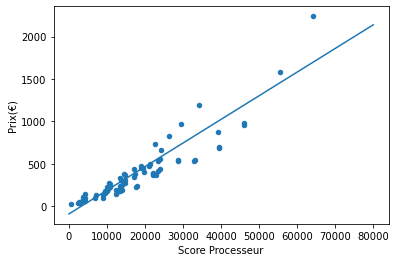

In [43]:
dataframe_topachat_processeur_2.plot(x="Score Processeur", y="Prix(€)", kind="scatter")
modeleRegression_processeur = LinearRegression()
modeleRegression_processeur.fit(np.array(dataframe_topachat_processeur_2['Score Processeur']).reshape(-1,1), dataframe_topachat_processeur_2['Prix(€)'])

print(modeleRegression_processeur.intercept_)
print(modeleRegression_processeur.coef_)

plt.plot([0,80000],[modeleRegression_processeur.intercept_, modeleRegression_processeur.coef_*80000])

#On rajoute les scores au dataframe de la carte graphique

In [44]:
def composant_appartient_liste(liste, nom_composant):
    for i in liste:
        if (nom_composant.find(i)==-1):
            return False
    return True

def ajout_carte_graphique_score(dataframe_topachat, dataframe_score):
    liste_score_correspondant = []
    for i in dataframe_topachat.index:
        print("Carte graphique n°"+i)
        liste_correspondance_nom = []  
        for j in dataframe_score.index:
            mots_composant = dataframe_score['Nom'][j].split(" ")
            if (composant_appartient_liste(mots_composant, dataframe_topachat['Nom'][i])):
                liste_correspondance_nom.append((dataframe_score['Nom'][j], dataframe_score['Score'][j]))       
        max = len(liste_correspondance_nom[0][0])
        liste_score_correspondant.append(liste_correspondance_nom[0][1])
        for k in range(1,len(liste_correspondance_nom)):
            if (len(liste_correspondance_nom[k][0])> max):
                max = len(liste_correspondance_nom[k][0])
                liste_score_correspondant[i] = liste_correspondance_nom[k][1]
    return liste_score_correspondant


        
    
liste_score_topachat_cartegraphique = ajout_carte_graphique_score(dataframe_topachat_cartegraphique, dataframe_score_cartegraphique)
print(liste_score_topachat_cartegraphique)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

#on ajoute la colonne de score et de performance aux cartes graphiques

-351.3086190117356
[0.06085702]
                                                   Nom  Prix(€)  \
0                     AORUS GeForce RTX 3060 Ti MASTER   619.99   
1                        AORUS GeForce RTX 3070 MASTER   799.99   
2             AORUS GeForce RTX 3080 XTREME WATERFORCE  1199.99   
3          AORUS GeForce RTX 3080 XTREME WATERFORCE WB  1199.99   
4             AORUS GeForce RTX 3090 XTREME WATERFORCE  2199.99   
..                                                 ...      ...   
341  Zotac Gaming GeForce RTX 3080 AMP Holo + Call ...   959.99   
342  Zotac Gaming GeForce RTX 3080 TRINITY + Call o...   799.99   
343  Zotac Gaming GeForce RTX 3080 TRINITY OC + Cal...   879.99   
344  Zotac Gaming GeForce RTX 3090 TRINITY + Call o...  1699.99   
345  Zotac GeForce RTX 3090 TRINITY OC + Call of Du...  1899.99   

                          Informations Supplementaires  \
0    Carte graphique PCI-Express overclockée - Refr...   
1    Carte graphique PCI-Express overclockée - 

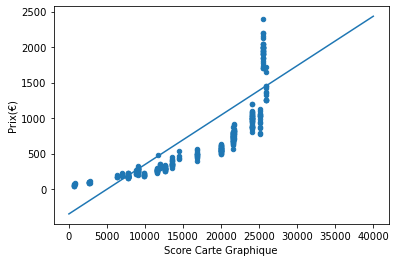

In [45]:
if (type(liste_score_topachat_cartegraphique[0])!=float):
    for i in range(len(liste_score_topachat_cartegraphique)):
        liste_score_topachat_cartegraphique[i] = float(liste_score_topachat_cartegraphique[i])
dataframe_topachat_cartegraphique['Score Carte Graphique'] = liste_score_topachat_cartegraphique

dataframe_topachat_cartegraphique.plot(x="Score Carte Graphique", y="Prix(€)", kind="scatter")
modeleRegression_cartegraphique = LinearRegression()
modeleRegression_cartegraphique.fit(np.array(dataframe_topachat_cartegraphique['Score Carte Graphique']).reshape(-1,1), dataframe_topachat_cartegraphique['Prix(€)'])

print(modeleRegression_cartegraphique.intercept_)
print(modeleRegression_cartegraphique.coef_)
plt.plot([0,40000],[modeleRegression_cartegraphique.intercept_, modeleRegression_cartegraphique.coef_*40000])

def ajout_carte_graphique_performance(dataframe_topachat):
    liste_performance = []
    maxi = max(dataframe_topachat['Score Carte Graphique'])
    mini = min(dataframe_topachat['Score Carte Graphique'])
    for i in dataframe_topachat.index:
        liste_performance.append((dataframe_topachat['Score Carte Graphique'][i]-mini)/(maxi-mini))
    dataframe_topachat['Performance']=liste_performance
ajout_carte_graphique_performance(dataframe_topachat_cartegraphique)
print(dataframe_topachat_cartegraphique)

#On affiche les meilleures cartes graphiques

In [46]:
dataframe_topachat_cartegraphique2 = dataframe_topachat_cartegraphique[dataframe_topachat_cartegraphique['Prix(€)']>1000]
dataframe_topachat_cartegraphique3 = dataframe_topachat_cartegraphique2[dataframe_topachat_cartegraphique2['Score Carte Graphique']>25000]
dataframe_topachat_cartegraphique3.head(50).sort_values('Score Carte Graphique')

,Nom,Prix(€),Informations Supplementaires,Reference url,Score Carte Graphique,Performance
6,AORUS Radeon RX 6800 XT MASTER,1024.99,Carte graphique PCI-Express overclockée - Refr...,https://www.topachat.com/pages/detail2_cat_est...,25141.0,0.967623
7,AORUS Radeon RX 6800 XT MASTER TYPE C,1024.99,Carte graphique PCI-Express overclockée - Refr...,https://www.topachat.com/pages/detail2_cat_est...,25141.0,0.967623
20,ASRock Radeon RX 6800 XT Phantom Gaming D OC,1049.99,Carte graphique PCI-Express overclockée - Refr...,https://www.topachat.com/pages/detail2_cat_est...,25141.0,0.967623
21,ASRock Radeon RX 6800 XT Taichi X OC,1099.99,Carte graphique PCI-Express overclockée - Refr...,https://www.topachat.com/pages/detail2_cat_est...,25141.0,0.967623
305,PowerColor Radeon RX 6800 XT Red Devil Limited...,1049.99,Carte graphique PCI-Express overclockée - Refr...,https://www.topachat.com/pages/detail2_cat_est...,25141.0,0.967623
304,PowerColor Radeon RX 6800 XT Red Devil,1029.99,Carte graphique PCI-Express overclockée - Refr...,https://www.topachat.com/pages/detail2_cat_est...,25141.0,0.967623
79,ASUS Radeon RX 6800 XT ROG STRIX LC O16G GAMING,1129.99,Carte graphique PCI-Express overclockée - Refr...,https://www.topachat.com/pages/detail2_cat_est...,25141.0,0.967623
258,MSI Radeon RX 6800 XT GAMING X TRIO,1039.99,Carte graphique PCI-Express overclockée - Refr...,https://www.topachat.com/pages/detail2_cat_est...,25141.0,0.967623
4,AORUS GeForce RTX 3090 XTREME WATERFORCE,2199.99,Carte graphique PCI-Express overclockée - Refr...,https://www.topachat.com/pages/detail2_cat_est...,25465.0,0.980416
196,Gigabyte GeForce RTX 3090 EAGLE OC + Call of D...,1899.99,Carte graphique PCI-Express - Refroidissement ...,https://www.topachat.com/pages/detail2_cat_est...,25465.0,0.980416


#Correspondance Socket/Chipset et Chipset/Frequence

In [47]:
dico_correspondance_socket_chipset = {"1151":["B360","B365","H110","H310","H370","Z390"], 
                                      "1200":["B460","H410","H470","Z490"], 
                                      "2066":["X299"], 
                                      "AM4":["A320","A520","B450","B550","X470","X570"],
                                      "TRX4":["TRX40"]}

dico_correspondance_chipset_frequenceRAM = {"B360":[2133, 2666], 
                                            "B365":[2133, 2666], 
                                            "H110":[2133], 
                                            "H310":[2133, 2666],
                                            "H370":[2133, 2666], 
                                            "Z390":[2133, 4000], 
                                            "B460":[2133, 2933], 
                                            "H410":[2133, 2933], 
                                            "H470":[2133, 2933], 
                                            "Z490":[2133, 4600], 
                                            "X299": [2133, 4200], 
                                            "A320":[2133, 2666], 
                                            "A520": [2133, 5000], 
                                            "B450":[2133, 3466], 
                                            "B550":[2133, 4400],
                                            "X470":[2133, 4133], 
                                            "X570":[1866, 4400], 
                                            "TRX40":[2133, 4666]
                                           }

#Fonction qui ajoute une colonne 'chipset' aux cartes mères et une fonction qui ajoute les caractéristiques des RAM aux cartes mères

In [48]:
def ajout_chipset_carte_mere(dataframe_carte_mere, socket):
    Chipset = []
    liste_chipset = dico_correspondance_socket_chipset[socket]
    for i in dataframe_carte_mere.index:
        liste_infos = dataframe_carte_mere['Informations Supplementaires'][i].split(" ")
        for indice_mot in range (len(liste_infos)):
            if (liste_infos[indice_mot] == "Chipset"):
                if (liste_infos[indice_mot + 2] not in liste_chipset) :
                    Chipset.append("NaN")
                else:
                    Chipset.append(liste_infos[indice_mot + 2])
    dataframe_carte_mere['Chipset'] = Chipset

def ajout_caracteristique_ram(dataframe_carte_mere):
    liste_nombre_slots = []
    liste_giga_max = []
    for i in dataframe_carte_mere.index:
        page_topachat = requests.get(dataframe_carte_mere["Reference url"][i])
        soup_topachat = BeautifulSoup(page_topachat.text, "html.parser")
        section = soup_topachat.find('section', attrs = {'id':'fiche-technique'})
        memoire = section.findAll('div', attrs = {"class":"caracLine"})
        index_memoire = -1
        for j in range (len(memoire)):
            if (memoire[j].find('div', attrs = {'class':'caracName'}).text == "Mémoire"):
                index_memoire = j
        info_memoire = memoire[index_memoire].findAll('li')
        if (len(info_memoire)==0):  
            nombre_slots = memoire[index_memoire].find('span').text[0]
            info_memoire = memoire[index_memoire].findAll('span')
        else :
            nombre_slots = info_memoire[0].text[0]
        liste_nombre_slots.append(nombre_slots)
        boolean = True
        compteur = -1
        while(boolean):
            compteur += 1
            if(compteur ==len(info_memoire)):
                liste_giga_max.append("NaN")
                boolean = False
                break
            separation = info_memoire[compteur].text.split(" ")
            for k in range(len(separation)):
                if(separation[k].find("Go")!=-1):
                    if (separation[k-1].find("max.") != -1):
                        liste_giga_max.append(separation[k-1][4:])
                    elif (separation[k-1].find("*") != -1):
                        liste_giga_max.append(separation[k-1][:-1])
                    else:
                        liste_giga_max.append(separation[k-1])
                    boolean = False
                    break
                elif (separation[k].find("GB")!=-1):
                    if (separation[k].find("max.") != -1):
                        liste_giga_max.append(separation[k][4:separation[k].find("GB")])
                    elif (separation[k].find("*") != -1):
                        liste_giga_max.append(separation[k][:-1])
                    else:
                        liste_giga_max.append(separation[k][:separation[k].find("GB")])
                    boolean = False
                    break
            
    dataframe_carte_mere['Slots'] = liste_nombre_slots
    dataframe_carte_mere['Go max'] = liste_giga_max
    
    
    
#ajout chipset 1151
ajout_chipset_carte_mere(dataframe_topachat_1151, "1151")
ajout_caracteristique_ram(dataframe_topachat_1151)
print(dataframe_topachat_1151)
print("Le nombre de NaN dans notre dataframe pour les chipsets est de : "+str((dataframe_topachat_1151['Chipset'] == "NaN").sum())+"\n")

#ajout chipset 1200
ajout_chipset_carte_mere(dataframe_topachat_1200, "1200")
dataframe_topachat_1200.loc[dataframe_topachat_1200['Nom']=="ASRock B460M Steel Legend", "Chipset"] = "B460"
ajout_caracteristique_ram(dataframe_topachat_1200)
print(dataframe_topachat_1200)
print("Le nombre de NaN dans notre dataframe pour les chipsets est de : "+str((dataframe_topachat_1200['Chipset'] == "NaN").sum())+"\n")

#ajout chipset 2066
ajout_chipset_carte_mere(dataframe_topachat_2066, "2066")
ajout_caracteristique_ram(dataframe_topachat_2066)
print(dataframe_topachat_2066)
print("Le nombre de NaN dans notre dataframe pour les chipsets est de : "+str((dataframe_topachat_2066['Chipset'] == "NaN").sum())+"\n")
  
#ajout chipset TRX4
ajout_chipset_carte_mere(dataframe_topachat_TRX4, "TRX4")
ajout_caracteristique_ram(dataframe_topachat_TRX4)
print(dataframe_topachat_TRX4)
print("Le nombre de NaN dans notre dataframe pour les chipsets est de : "+str((dataframe_topachat_TRX4['Chipset'] == "NaN").sum())+"\n")
    
#ajout chipset AM4
ajout_chipset_carte_mere(dataframe_topachat_AM4, "AM4")
ajout_caracteristique_ram(dataframe_topachat_AM4)
print(dataframe_topachat_AM4)
print("Le nombre de NaN dans notre dataframe pour les chipsets est de : "+str((dataframe_topachat_AM4['Chipset'] == "NaN").sum())+"\n")



                                  Nom  Prix(€)  \
0                    ASRock B365 Pro4   109.99   
1       ASRock B365M PHANTOM GAMING 4   104.99   
2                   ASRock B365M Pro4    84.99   
3                 ASRock B365M PRO4-F    99.99   
4                    ASRock B365M-HDV    84.99   
5                 ASRock B365M-ITX/AC   114.99   
6                ASRock H310CM-ITX/AC    99.99   
7                 ASRock Z390M-ITX/ac   164.99   
8                  Asus PRIME B360M-K    84.99   
9                Asus PRIME B365-PLUS   118.99   
10                 Asus PRIME B365M-A    99.99   
11                 ASUS PRIME B365M-K    99.99   
12                 Asus PRIME H310M-A    79.99   
13               Asus PRIME H370 PLUS   144.99   
14                  Asus PRIME Z390-A   229.99   
15                  Asus PRIME Z390-P   159.99   
16           Asus ROG MAXIMUS XI HERO   344.99   
17          Asus TUF B360 PLUS-GAMING   124.99   
18          Asus TUF Z390-PLUS GAMING   169.99   


#Fonction qui supprime les ram factices de notre dataframe et fonction qui ajoute les informations des RAMs au dataframe RAM

In [77]:
def supprimer_factices(dataframe_RAM):
    for i in dataframe_RAM.index :
        if(dataframe_RAM['Informations Supplementaires'][i].find("factices")!=-1):
            dataframe_RAM.drop([i], inplace=True)
        elif(dataframe_RAM['Nom'][i].find("Apple")!=-1):
            dataframe_RAM.drop([i], inplace=True)

def ajout_info_ram(dataframe_RAM):
    supprimer_factices(dataframe_RAM)
    CAS = []
    Stockage = []
    Nb_barrettes = []
    Frequence = []
    for i in dataframe_RAM.index :
        liste_nb_barrettes = dataframe_RAM['Nom'][i].split("(")
        if len(liste_nb_barrettes) == 1 :
            Nb_barrettes.append("1")
        elif len(liste_nb_barrettes) == 2:
            Nb_barrettes.append(liste_nb_barrettes[1][0])
        indice_tiret = dataframe_RAM['Nom'][i].find("-")
        indice_Go = dataframe_RAM['Nom'][i].find("Go")
        Stockage.append(dataframe_RAM['Nom'][i][indice_tiret+2:indice_Go-1])
        liste_infos = dataframe_RAM['Nom'][i].split(" ")
        for indice_mot in range (len(liste_infos)) :
            #print (liste_infos[indice_mot])
            if (liste_infos[indice_mot] == "MHz"):
                Frequence.append(int(liste_infos[indice_mot -1]))
            elif(liste_infos[indice_mot] == "Mhz"):
                Frequence.append(int(liste_infos[indice_mot -1]))
            if (liste_infos[indice_mot] == "CAS"):
                CAS.append(int(liste_infos[indice_mot+1]))
            
    dataframe_RAM['Stockage'] = Stockage
    dataframe_RAM['Nb_barrettes'] = Nb_barrettes
    print(len(Frequence))
    print(len(dataframe_RAM))
    dataframe_RAM['Frequence'] = Frequence
    dataframe_RAM['CAS'] = CAS
    
ajout_info_ram(dataframe_topachat_DDR4)


def performance_RAM(dataframe_RAM):
    liste_performance = []
    maxFrequence = dataframe_RAM['Frequence'].max()
    minFrequence = dataframe_RAM['Frequence'].min()
    maxCAS = 20
    minCAS = 12
    for i in dataframe_RAM.index:
        liste_performance.append((((0.8*int(dataframe_RAM['Frequence'][i])-minFrequence)/(maxFrequence-minFrequence)+0.2*(maxCAS - int(dataframe_RAM['CAS'][i]))/(maxCAS-minCAS)))/2)
    dataframe_RAM['Performance'] = liste_performance
    
performance_RAM(dataframe_topachat_DDR4)
print(dataframe_topachat_DDR4)


776
776
                                                   Nom  Prix(€)  \
0    Corsair Vengeance LPX Noir - 128 Go (4 x 32 Go...  1599.99   
3    DDR4 Aorus RGB - 16 Go (2 x 8 Go) 4400 MHz - C...   189.99   
7    DDR4 Ballistix Elite - 16 Go (2 x 8 Go) 4000 M...   249.99   
8    DDR4 Corsair Dominator Platinum - 32 Go (2 x 1...   359.99   
9    DDR4 Corsair Dominator Platinum RGB - 128 Go (...   999.99   
..                                                 ...      ...   
776  DDR4 Textorm - 64 Go (4 x 16 Go) 2666 MHz - CA...   269.99   
777  DDR4 Textorm - 64 Go (4 x 16 Go) 3200 MHz - CA...   299.99   
778              DDR4 Textorm - 8 Go 2666 MHz - CAS 19    39.99   
779              DDR4 Textorm - 8 Go 3200 MHz - CAS 16    44.99   
780  DDR4 HyperX Predator RGB - 8 Go 4000 MHz - CAS 19    84.99   

                          Informations Supplementaires  \
0    Kit Quad Channel - Mémoire DDR4 optimisée Inte...   
3    Kit Dual Channel - Mémoire DDR4 optimisée Inte...   
7    Kit Dual

#Fonction qui ajoute les sockets aux processeurs
#Fonction qui détermine la meilleure configuration pour un certain prix (carte mère, processeur, ram, carte graphique)
#Fonction qui fait le produit cartésien entre les ram et les cartes mères
#Fonction qui fait le produit cartésien entre le dataframe précédent et les processeurs

In [88]:
def ajout_socket_processeur(dataframe_processeur):
    Socket = []
    liste_sockets = ["AM4", "1151", "1200", "TRX4", "2066"]
    for i in dataframe_processeur.index :
        liste_infos = dataframe_processeur['Informations Supplementaires'][i].split(" ")
        for indice_mot in range (len(liste_infos)) :
            if (liste_infos[indice_mot] == "Socket"):
                if (liste_infos[indice_mot + 1] not in liste_sockets) :
                    Socket.append("NaN")
                else:
                    Socket.append(liste_infos[indice_mot + 1])

    dataframe_processeur['Socket'] = Socket
ajout_socket_processeur(dataframe_topachat_processeur)

def combinaison_configuration(prix, fonctionnalite, stockage="defaut", gigaRAM=0, processeur="defaut", carteGraphique="defaut", carteMere="defaut"):
    if (fonctionnalite=="Ordinateur Gaming"):
        poids_processeur = 0.2
        poids_cartegraphique = 0.25
        poids_ram =0.05
        incertitude_poids = 0.05
        incertitude_poids_ram = 0.01
        minimum_prix_ram = (poids_ram-incertitude_poids_ram)*prix
        maximum_prix_ram = (poids_ram+incertitude_poids_ram)*prix
        minimum_prix_processeur = (poids_processeur-incertitude_poids)*prix
        maximum_prix_processeur = (poids_processeur+incertitude_poids)*prix
        minimum_prix_cartegraphique = (poids_cartegraphique-incertitude_poids)*prix
        maximum_prix_cartegraphique = (poids_cartegraphique+incertitude_poids)*prix
        dataframe_tranche_prix_processeur = dataframe_topachat_processeur[(dataframe_topachat_processeur['Prix(€)']<maximum_prix_processeur) & (dataframe_topachat_processeur['Prix(€)']>minimum_prix_processeur)]
        dataframe_tranche_prix_processeur = dataframe_tranche_prix_processeur.rename(columns={"Nom":"Nom Processeur", "Prix(€)":"Prix(€) Processeur", "Informations Supplementaires":"Informations Supplementaires Processeur", "Reference url":"Reference url Processeur"})
        dataframe_tranche_prix_cartegraphique = dataframe_topachat_cartegraphique[(dataframe_topachat_cartegraphique['Prix(€)']<maximum_prix_cartegraphique) & (dataframe_topachat_cartegraphique['Prix(€)']>minimum_prix_cartegraphique)]
        dataframe_tranche_prix_cartegraphique = dataframe_tranche_prix_cartegraphique.rename(columns={"Nom":"Nom Carte Graphique", "Prix(€)":"Prix(€) Carte Graphique", "Informations Supplementaires":"Informations Supplementaires Carte Graphique", "Reference url":"Reference url Carte Graphique"})
        dataframe_tranche_prix_ram = dataframe_topachat_DDR4[(dataframe_topachat_DDR4['Prix(€)']<maximum_prix_ram) & (dataframe_topachat_DDR4['Prix(€)']>minimum_prix_ram)]
        dataframe_tranche_prix_ram = dataframe_tranche_prix_ram.rename(columns={"Nom":"Nom RAM", "Prix(€)":"Prix(€) RAM", "Informations Supplementaires":"Informations Supplementaires RAM", "Reference url":"Reference url RAM"})
        dataframe_cartesien_AM4_ram = ajout_ram_carte_mere(dataframe_topachat_AM4,dataframe_tranche_prix_ram)
        dataframe_cartesien_1151_ram = ajout_ram_carte_mere(dataframe_topachat_1151,dataframe_tranche_prix_ram)
        dataframe_cartesien_1200_ram = ajout_ram_carte_mere(dataframe_topachat_1200,dataframe_tranche_prix_ram) 
        dataframe_cartesien_TRX4_ram = ajout_ram_carte_mere(dataframe_topachat_TRX4,dataframe_tranche_prix_ram)
        dataframe_cartesien_2066_ram = ajout_ram_carte_mere(dataframe_topachat_2066,dataframe_tranche_prix_ram)
        #dataframe_cartesien_CM_RAM_processeur = ajout_processeur_CM_RAM(dataframe_cartesien_AM4_ram, dataframe_cartesien_TRX4_ram, dataframe_cartesien_1151_ram, dataframe_cartesien_1200_ram, dataframe_cartesien_2066_ram, dataframe_tranche_prix_processeur)
        print("fin")
        meilleur_ordinateur = meilleure_configuration(prix, dataframe_tranche_prix_processeur, dataframe_tranche_prix_cartegraphique, dataframe_cartesien_AM4_ram, dataframe_cartesien_TRX4_ram, dataframe_cartesien_1151_ram, dataframe_cartesien_1200_ram, dataframe_cartesien_2066_ram)
        print(meilleur_ordinateur)
        if (meilleur_ordinateur[3]=="AM4"):
            liste_meilleur_ordinateur = [dataframe_tranche_prix_processeur.loc[meilleur_ordinateur[0]], 
                                         dataframe_tranche_prix_cartegraphique.loc[meilleur_ordinateur[1]], 
                                         dataframe_cartesien_AM4_ram.loc[meilleur_ordinateur[2]]]
        if (meilleur_ordinateur[3]=="TRX4"):
            liste_meilleur_ordinateur = [dataframe_tranche_prix_processeur.loc[meilleur_ordinateur[0]], 
                                         dataframe_tranche_prix_cartegraphique.loc[meilleur_ordinateur[1]], 
                                         dataframe_cartesien_TRX4_ram.loc[meilleur_ordinateur[2]]]                        
        if (meilleur_ordinateur[3]=="1151"):
            liste_meilleur_ordinateur = [dataframe_tranche_prix_processeur.loc[meilleur_ordinateur[0]], 
                                         dataframe_tranche_prix_cartegraphique.loc[meilleur_ordinateur[1]], 
                                         dataframe_cartesien_1151_ram.loc[meilleur_ordinateur[2]]]
        if (meilleur_ordinateur[3]=="1200"):
            liste_meilleur_ordinateur = [dataframe_tranche_prix_processeur.loc[meilleur_ordinateur[0]], 
                                         dataframe_tranche_prix_cartegraphique.loc[meilleur_ordinateur[1]], 
                                         dataframe_cartesien_1200_ram.loc[meilleur_ordinateur[2]]]
        if (meilleur_ordinateur[3]=="2066"):
            liste_meilleur_ordinateur = [dataframe_tranche_prix_processeur.loc[meilleur_ordinateur[0]], 
                                         dataframe_tranche_prix_cartegraphique.loc[meilleur_ordinateur[1]], 
                                         dataframe_cartesien_2066_ram.loc[meilleur_ordinateur[2]]]
        print(liste_meilleur_ordinateur[0])
        print(liste_meilleur_ordinateur[1])
        print(liste_meilleur_ordinateur[2])
        return liste_meilleur_ordinateur
        
def ajout_ram_carte_mere(dataframe_CM, dataframe_RAM):
    dataframe_cartesien_cm_ram = pd.DataFrame(columns = ['Nom Carte mère', 'Prix(€) Carte mère', 'Informations Supplementaires Carte mère', 'Reference url Carte mère','Slots Carte mère','Go max Carte mère', 'Nom RAM','Prix(€) RAM', 'Informations Supplementaires RAM', 'Reference url RAM', 'Stockage RAM', 'Nb_barrettes RAM','Performance'])
    compteur = 0
    for i in dataframe_CM.index:
        for j in dataframe_RAM.index:
            if ((int(dataframe_RAM['Nb_barrettes'][j]) <= int(dataframe_CM['Slots'][i])) and (int(dataframe_RAM['Stockage'][j])<= int(dataframe_CM['Go max'][i]))and (dataframe_RAM['Frequence'][j]<= dico_correspondance_chipset_frequenceRAM[dataframe_CM['Chipset'][i]][1]) and (dataframe_RAM['Frequence'][j]>= dico_correspondance_chipset_frequenceRAM[dataframe_CM['Chipset'][i]][0])):
                dataframe_cartesien_cm_ram.loc[compteur] = [dataframe_CM['Nom'][i],
                                                            dataframe_CM['Prix(€)'][i],
                                                            dataframe_CM['Informations Supplementaires'][i],
                                                            dataframe_CM['Reference url'][i],
                                                            dataframe_CM['Slots'][i],
                                                            dataframe_CM['Go max'][i],
                                                            dataframe_RAM['Nom RAM'][j],
                                                            dataframe_RAM['Prix(€) RAM'][j],
                                                            dataframe_RAM['Informations Supplementaires RAM'][j],
                                                            dataframe_RAM['Reference url RAM'][j],
                                                            dataframe_RAM['Stockage'][j],
                                                            dataframe_RAM['Nb_barrettes'][j],
                                                            dataframe_RAM['Performance'][j]]
                compteur += 1
    return dataframe_cartesien_cm_ram

def ajout_processeur_CM_RAM(dataframe_CM_RAM_AM4, dataframe_CM_RAM_TRX4, dataframe_CM_RAM_1151, dataframe_CM_RAM_1200, dataframe_CM_RAM_2066, dataframe_processeur):
    compteur = 0
    dataframe_cartesien_cm_ram_processeur = pd.DataFrame(columns = ['Nom Carte mère', 'Prix(€) Carte mère', 'Informations Supplementaires Carte mère', 'Reference url Carte mère','Slots Carte mère','Go max Carte mère', 'Nom RAM','Prix(€) RAM', 'Informations Supplementaires RAM', 'Reference url RAM', 'Stockage RAM', 'Nb_barrettes RAM', 'Score RAM', 'Nom Processeur', 'Prix(€) Processeur', 'Informations Supplementaires Processeur', 'Reference url Processeur', 'Score Processeur','Socket Processeur'])
    for i in dataframe_processeur.index:
            print(i)
            if (dataframe_processeur['Socket'][i]=="AM4"):
                for j in dataframe_CM_RAM_AM4.index:
                    dataframe_cartesien_cm_ram_processeur.loc[compteur] = [dataframe_CM_RAM_AM4['Nom Carte mère'][j],
                                                                           dataframe_CM_RAM_AM4['Prix(€) Carte mère'][j],
                                                                           dataframe_CM_RAM_AM4['Informations Supplementaires Carte mère'][j],
                                                                           dataframe_CM_RAM_AM4['Reference url Carte mère'][j],
                                                                           dataframe_CM_RAM_AM4['Slots Carte mère'][j],
                                                                           dataframe_CM_RAM_AM4['Go max Carte mère'][j],
                                                                           dataframe_CM_RAM_AM4['Nom RAM'][j],
                                                                           dataframe_CM_RAM_AM4['Prix(€) RAM'][j],
                                                                           dataframe_CM_RAM_AM4['Informations Supplementaires RAM'][j],
                                                                           dataframe_CM_RAM_AM4['Reference url RAM'][j],
                                                                           dataframe_CM_RAM_AM4['Stockage RAM'][j],
                                                                           dataframe_CM_RAM_AM4['Nb_barrettes RAM'][j],
                                                                           dataframe_CM_RAM_AM4['Performance'][j], 
                                                                           dataframe_processeur['Nom Processeur'][i],
                                                                           dataframe_processeur['Prix(€) Processeur'][i], 
                                                                           dataframe_processeur['Informations Supplementaires Processeur'][i], 
                                                                           dataframe_processeur['Reference url Processeur'][i], 
                                                                           dataframe_processeur['Score Processeur'][i], 
                                                                           dataframe_processeur['Socket'][i]]
                    compteur += 1                    
            elif (dataframe_processeur['Socket'][i]=="TRX4"):
                for j in dataframe_CM_RAM_TRX4.index:
                    dataframe_cartesien_cm_ram_processeur.loc[compteur] = [dataframe_CM_RAM_TRX4['Nom Carte mère'][j],
                                                                           dataframe_CM_RAM_TRX4['Prix(€) Carte mère'][j],
                                                                           dataframe_CM_RAM_TRX4['Informations Supplementaires Carte mère'][j],
                                                                           dataframe_CM_RAM_TRX4['Reference url Carte mère'][j],
                                                                           dataframe_CM_RAM_TRX4['Slots Carte mère'][j],
                                                                           dataframe_CM_RAM_TRX4['Go max Carte mère'][j],
                                                                           dataframe_CM_RAM_TRX4['Nom RAM'][j],
                                                                           dataframe_CM_RAM_TRX4['Prix(€) RAM'][j],
                                                                           dataframe_CM_RAM_TRX4['Informations Supplementaires RAM'][j],
                                                                           dataframe_CM_RAM_TRX4['Reference url RAM'][j],
                                                                           dataframe_CM_RAM_TRX4['Stockage RAM'][j],
                                                                           dataframe_CM_RAM_TRX4['Nb_barrettes RAM'][j],
                                                                           dataframe_CM_RAM_TRX4['Performance'][j], 
                                                                           dataframe_processeur['Nom Processeur'][i],
                                                                           dataframe_processeur['Prix(€) Processeur'][i], 
                                                                           dataframe_processeur['Informations Supplementaires Processeur'][i], 
                                                                           dataframe_processeur['Reference url Processeur'][i], 
                                                                           dataframe_processeur['Score Processeur'][i], 
                                                                           dataframe_processeur['Socket'][i]]
                    compteur += 1 
            elif (dataframe_processeur['Socket'][i]=="1200"):
                for j in dataframe_CM_RAM_1200.index:
                    dataframe_cartesien_cm_ram_processeur.loc[compteur] = [dataframe_CM_RAM_1200['Nom Carte mère'][j],
                                                                           dataframe_CM_RAM_1200['Prix(€) Carte mère'][j],
                                                                           dataframe_CM_RAM_1200['Informations Supplementaires Carte mère'][j],
                                                                           dataframe_CM_RAM_1200['Reference url Carte mère'][j],
                                                                           dataframe_CM_RAM_1200['Slots Carte mère'][j],
                                                                           dataframe_CM_RAM_1200['Go max Carte mère'][j],
                                                                           dataframe_CM_RAM_1200['Nom RAM'][j],
                                                                           dataframe_CM_RAM_1200['Prix(€) RAM'][j],
                                                                           dataframe_CM_RAM_1200['Informations Supplementaires RAM'][j],
                                                                           dataframe_CM_RAM_1200['Reference url RAM'][j],
                                                                           dataframe_CM_RAM_1200['Stockage RAM'][j],
                                                                           dataframe_CM_RAM_1200['Nb_barrettes RAM'][j],
                                                                           dataframe_CM_RAM_1200['Performance'][j], 
                                                                           dataframe_processeur['Nom Processeur'][i],
                                                                           dataframe_processeur['Prix(€) Processeur'][i], 
                                                                           dataframe_processeur['Informations Supplementaires Processeur'][i], 
                                                                           dataframe_processeur['Reference url Processeur'][i], 
                                                                           dataframe_processeur['Score Processeur'][i], 
                                                                           dataframe_processeur['Socket'][i]]
                    compteur += 1 
            elif (dataframe_processeur['Socket'][i]=="1151"):
                for j in dataframe_CM_RAM_1151.index:
                    dataframe_cartesien_cm_ram_processeur.loc[compteur] = [dataframe_CM_RAM_1151['Nom Carte mère'][j],
                                                                           dataframe_CM_RAM_1151['Prix(€) Carte mère'][j],
                                                                           dataframe_CM_RAM_1151['Informations Supplementaires Carte mère'][j],
                                                                           dataframe_CM_RAM_1151['Reference url Carte mère'][j],
                                                                           dataframe_CM_RAM_1151['Slots Carte mère'][j],
                                                                           dataframe_CM_RAM_1151['Go max Carte mère'][j],
                                                                           dataframe_CM_RAM_1151['Nom RAM'][j],
                                                                           dataframe_CM_RAM_1151['Prix(€) RAM'][j],
                                                                           dataframe_CM_RAM_1151['Informations Supplementaires RAM'][j],
                                                                           dataframe_CM_RAM_1151['Reference url RAM'][j],
                                                                           dataframe_CM_RAM_1151['Stockage RAM'][j],
                                                                           dataframe_CM_RAM_1151['Nb_barrettes RAM'][j],
                                                                           dataframe_CM_RAM_1151['Performance'][j], 
                                                                           dataframe_processeur['Nom Processeur'][i],
                                                                           dataframe_processeur['Prix(€) Processeur'][i], 
                                                                           dataframe_processeur['Informations Supplementaires Processeur'][i], 
                                                                           dataframe_processeur['Reference url Processeur'][i], 
                                                                           dataframe_processeur['Score Processeur'][i], 
                                                                           dataframe_processeur['Socket'][i]]
                    compteur += 1 
            elif (dataframe_processeur['Socket'][i]=="2066"):
                for j in dataframe_CM_RAM_2066.index:
                    dataframe_cartesien_cm_ram_processeur.loc[compteur] = [dataframe_CM_RAM_2066['Nom Carte mère'][j],
                                                                           dataframe_CM_RAM_2066['Prix(€) Carte mère'][j],
                                                                           dataframe_CM_RAM_2066['Informations Supplementaires Carte mère'][j],
                                                                           dataframe_CM_RAM_2066['Reference url Carte mère'][j],
                                                                           dataframe_CM_RAM_2066['Slots Carte mère'][j],
                                                                           dataframe_CM_RAM_2066['Go max Carte mère'][j],
                                                                           dataframe_CM_RAM_2066['Nom RAM'][j],
                                                                           dataframe_CM_RAM_2066['Prix(€) RAM'][j],
                                                                           dataframe_CM_RAM_2066['Informations Supplementaires RAM'][j],
                                                                           dataframe_CM_RAM_2066['Reference url RAM'][j],
                                                                           dataframe_CM_RAM_2066['Stockage RAM'][j],
                                                                           dataframe_CM_RAM_2066['Nb_barrettes RAM'][j],
                                                                           dataframe_CM_RAM_2066['Performance'][j], 
                                                                           dataframe_processeur['Nom Processeur'][i],
                                                                           dataframe_processeur['Prix(€) Processeur'][i], 
                                                                           dataframe_processeur['Informations Supplementaires Processeur'][i], 
                                                                           dataframe_processeur['Reference url Processeur'][i], 
                                                                           dataframe_processeur['Score Processeur'][i], 
                                                                           dataframe_processeur['Socket'][i]]
                    compteur += 1 
    return dataframe_cartesien_cm_ram_processeur

def meilleure_configuration(prix, dataframe_processeur, dataframe_cartegraphique, dataframe_CM_RAM_AM4, dataframe_CM_RAM_TRX4, dataframe_CM_RAM_1151, dataframe_CM_RAM_1200, dataframe_CM_RAM_2066):
    score_performance = 0.0
    index_memo = [0, 0, 0, ""]
    for i in dataframe_processeur.index:
        print(i)
        for j in dataframe_cartegraphique.index:
            if (dataframe_processeur['Socket'][i]=="AM4"):
                for k in dataframe_CM_RAM_AM4.index:
                    if (((0.2*dataframe_processeur['Performance'][i]+0.25*dataframe_cartegraphique['Performance'][j]+0.05*dataframe_CM_RAM_AM4['Performance'][k])>score_performance) and ((dataframe_processeur['Prix(€) Processeur'][i]+dataframe_cartegraphique['Prix(€) Carte Graphique'][j]+dataframe_CM_RAM_AM4['Prix(€) Carte mère'][k]+dataframe_CM_RAM_AM4['Prix(€) RAM'][k])<0.6*prix)):
                        score_performance = 0.2*dataframe_processeur['Performance'][i]+0.25*dataframe_cartegraphique['Performance'][j]+0.05*dataframe_CM_RAM_AM4['Performance'][k]
                        index_memo = [i, j, k, "AM4"]
            elif (dataframe_processeur['Socket'][i]=="TRX4"):
                for k in dataframe_CM_RAM_TRX4.index:
                    if (((0.2*dataframe_processeur['Performance'][i]+0.25*dataframe_cartegraphique['Performance'][j]+0.05*dataframe_CM_RAM_TRX4['Performance'][k])>score_performance) and ((dataframe_processeur['Prix(€) Processeur'][i]+dataframe_cartegraphique['Prix(€) Carte Graphique'][j]+dataframe_CM_RAM_TRX4['Prix(€) Carte mère'][k]+dataframe_CM_RAM_TRX4['Prix(€) RAM'][k])<0.6*prix)):
                        score_performance = 0.2*dataframe_processeur['Performance'][i]+0.25*dataframe_cartegraphique['Performance'][j]+0.05*dataframe_CM_RAM_TRX4['Performance'][k]
                        index_memo = [i, j, k, "TRX4"]  
            elif (dataframe_processeur['Socket'][i]=="1151"):
                for k in dataframe_CM_RAM_1151.index:
                    if (((0.2*dataframe_processeur['Performance'][i]+0.25*dataframe_cartegraphique['Performance'][j]+0.05*dataframe_CM_RAM_1151['Performance'][k])>score_performance) and ((dataframe_processeur['Prix(€) Processeur'][i]+dataframe_cartegraphique['Prix(€) Carte Graphique'][j]+dataframe_CM_RAM_1151['Prix(€) Carte mère'][k]+dataframe_CM_RAM_1151['Prix(€) RAM'][k])<0.6*prix)):
                        score_performance = 0.2*dataframe_processeur['Performance'][i]+0.25*dataframe_cartegraphique['Performance'][j]+0.05*dataframe_CM_RAM_1151['Performance'][k]
                        index_memo = [i, j, k, "1151"]
            elif (dataframe_processeur['Socket'][i]=="1200"):
                for k in dataframe_CM_RAM_1200.index:
                    if (((0.2*dataframe_processeur['Performance'][i]+0.25*dataframe_cartegraphique['Performance'][j]+0.05*dataframe_CM_RAM_1200['Performance'][k])>score_performance) and ((dataframe_processeur['Prix(€) Processeur'][i]+dataframe_cartegraphique['Prix(€) Carte Graphique'][j]+dataframe_CM_RAM_1200['Prix(€) Carte mère'][k]+dataframe_CM_RAM_1200['Prix(€) RAM'][k])<0.6*prix)):
                        score_performance = 0.2*dataframe_processeur['Performance'][i]+0.25*dataframe_cartegraphique['Performance'][j]+0.05*dataframe_CM_RAM_1200['Performance'][k]
                        index_memo = [i, j, k, "1200"]
            elif (dataframe_processeur['Socket'][i]=="2066"):
                for k in dataframe_CM_RAM_2066.index:
                    if (((0.2*dataframe_processeur['Performance'][i]+0.25*dataframe_cartegraphique['Performance'][j]+0.05*dataframe_CM_RAM_2066['Performance'][k])>score_performance) and ((dataframe_processeur['Prix(€) Processeur'][i]+dataframe_cartegraphique['Prix(€) Carte Graphique'][j]+dataframe_CM_RAM_2066['Prix(€) Carte mère'][k]+dataframe_CM_RAM_2066['Prix(€) RAM'][k])<0.6*prix)):
                        score_performance = 0.2*dataframe_processeur['Performance'][i]+0.25*dataframe_cartegraphique['Performance'][j]+0.05*dataframe_CM_RAM_2066['Performance'][k]
                        index_memo = [i, j, k, "2066"]
    return index_memo
        


combinaison_configuration(560, "Ordinateur Gaming")

fin
0
31
34
68
71
72
[34, 260, 309, '1151']
Nom Processeur                                                 Intel Core i3-9100F (3.6 GHz)
Prix(€) Processeur                                                                     92.99
Informations Supplementaires Processeur    Processeur Socket 1151 - Quad Core - Cache 6 M...
Reference url Processeur                   https://www.topachat.com/pages/detail2_cat_est...
Score Processeur                                                                        6795
Performance                                                                        0.0786201
Socket                                                                                  1151
Name: 34, dtype: object
Nom Carte Graphique                                     Palit GeForce GTX 1650 GamingPro OC GDDR6
Prix(€) Carte Graphique                                                                    149.99
Informations Supplementaires Carte Graphique          Carte graphique PCI-Express - C

[Nom Processeur                                                 Intel Core i3-9100F (3.6 GHz)
 Prix(€) Processeur                                                                     92.99
 Informations Supplementaires Processeur    Processeur Socket 1151 - Quad Core - Cache 6 M...
 Reference url Processeur                   https://www.topachat.com/pages/detail2_cat_est...
 Score Processeur                                                                        6795
 Performance                                                                        0.0786201
 Socket                                                                                  1151
 Name: 34, dtype: object,
 Nom Carte Graphique                                     Palit GeForce GTX 1650 GamingPro OC GDDR6
 Prix(€) Carte Graphique                                                                    149.99
 Informations Supplementaires Carte Graphique          Carte graphique PCI-Express - Compatible VR
 Reference url Cart

#Le programme précédent nous renvoie la meilleure configuration gamer (seulement carte mère, carte graphique, processeur, et ram) en dessous du prix rentré en paramètre
#On a ensuite le budget qu'il reste pour acheter les derniers composant du setup (Boitier, alimentation, reffroidissement, stockage)
#On aurait voulu rajouter cette option mais nous avons manqué de temps